In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pydna_epbd.utils.pickle_utils as pickle_utils
from pydna_epbd.utils.dicts import colors_dict

import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = "/usr/projects/pyDNA_EPBD/pyDNA_EPBD_inputs_outputs/"
simulation_inps_dir = root+"data/88_sequences/"
simulation_outs_dir = root+"outputs_simulation/88seqs_100iters/88_sequences/"

In [3]:
n_steps_after_preheating = 80000
norm = 1.00 / (n_steps_after_preheating)

In [4]:
def get_outputs(seq_name):
    out_filepath = simulation_outs_dir+f"{seq_name}.pkl"

    outputs = pickle_utils.load_pickle(out_filepath)
    print(f"\t---{seq_name}---")
    for key, value in outputs.items():
        print("\t", key, outputs[key].shape)# utils.get_dimension(outputs[key]))
    print()
    return outputs

p5_wt_outputs = get_outputs("12") #P5_wt
p5_mt_outputs = get_outputs("13") #P5_mt

	---12---
	 bubbles (77, 20, 20)
	 coord (77,)
	 coord_squared (77,)
	 flip_verbose (77, 5)

	---13---
	 bubbles (77, 20, 20)
	 coord (77,)
	 coord_squared (77,)
	 flip_verbose (77, 5)



<Figure size 640x480 with 0 Axes>

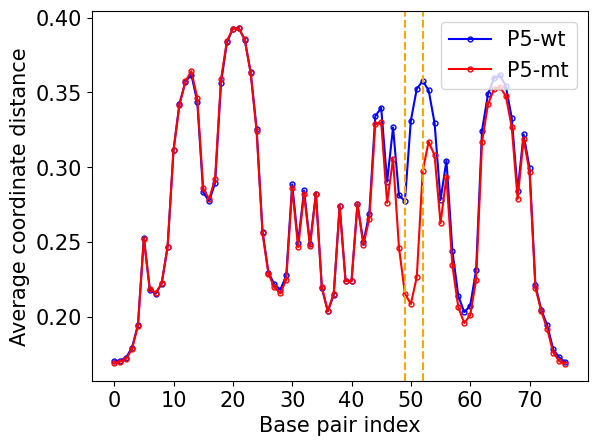

In [11]:
from matplotlib.patches import Rectangle
def plot_coord_features(p5_wt, p5_mt, y_label, plt_name):
    plt.clf()
    fig, ax = plt.subplots()

    plt.plot(p5_wt, label="P5-wt", color=colors_dict["wild_type"], marker=".", linestyle='-', markersize=7, linewidth=1.5, markerfacecolor='none')
    plt.plot(p5_mt, label="P5-mt", color=colors_dict["mutant_type"], marker=".", linestyle='-', markersize=7, linewidth=1.5, markerfacecolor='none')

    # P5_wt_seq = "GCGCGTGGCCATTTAGGGTATATATGGCCGAGTGAGCGAGCAGGATCTCCATTTTGACCGCGAAATTTGAACGGCGC"
    # plt.figtext(.514, 0.01, P5_wt_seq, wrap=True, horizontalalignment='center', size=9.79)

    # P5_mt_seq = "GCGCGTGGCCATTTAGGGTATATATGGCCGAGTGAGCGAGCAGGATCTCCGCTTTGACCGCGAAATTTGAACGGCGC"
    # plt.figtext(.514, -0.02, P5_mt_seq, wrap=True, horizontalalignment='center', size=9.79)

    # ax.add_patch(Rectangle((49, .15), 3, .4,
    #          edgecolor = 'orange',
    #          facecolor = 'none',
    #          linestyle='--',
    #          lw=2))
    ticks_labels_fontsize = 15
    plt.axvline(x = 49, color='orange', linestyle='--',)
    plt.axvline(x = 52, color='orange', linestyle='--',)
    plt.xlabel("Base pair index", fontsize=ticks_labels_fontsize)
    plt.ylabel(y_label, fontsize=ticks_labels_fontsize)
    plt.yticks(fontsize=ticks_labels_fontsize)
    plt.xticks(fontsize=ticks_labels_fontsize)
    plt.legend(fontsize=ticks_labels_fontsize, loc="upper right")
    # plt.show()
    plt.savefig(home_dir+f"plots/{plt_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)
    
p5_wt_avg_coord = p5_wt_outputs["coord"] * norm
p5_mt_avg_coord = p5_mt_outputs["coord"] * norm
plot_coord_features(p5_wt_avg_coord, p5_mt_avg_coord, "Average coordinate distance", "p5_wtmt_avg_coord")


<Figure size 640x480 with 0 Axes>

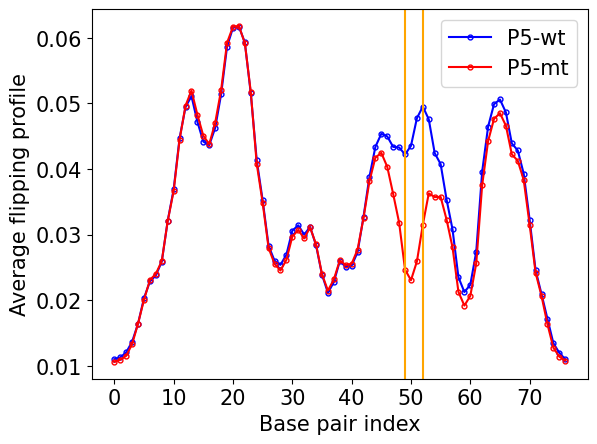

In [14]:
def plot_flip_features(p5_wt, p5_mt, y_label, plt_name):
    plt.clf()
    fig, ax = plt.subplots()

    plt.plot(p5_wt, label="P5-wt", color=colors_dict["wild_type"], marker=".", linestyle='-', markersize=7, linewidth=1.5, markerfacecolor='none')
    plt.plot(p5_mt, label="P5-mt", color=colors_dict["mutant_type"], marker=".", linestyle='-', markersize=7, linewidth=1.5, markerfacecolor='none')
    
    # ax.add_patch(Rectangle((49, .017), 3, .039,
    #          edgecolor = 'orange',
    #          facecolor = 'none',
    #          linestyle='--',
    #          lw=2))
    ticks_labels_fontsize = 15
    plt.axvline(x=49, color='orange', linestyle='--',)
    plt.axvline(x=52, color='orange', linestyle='--',)
    plt.xlabel("Base pair index", fontsize=ticks_labels_fontsize)
    plt.ylabel(y_label, fontsize=ticks_labels_fontsize)
    plt.yticks(fontsize=ticks_labels_fontsize)
    plt.xticks(fontsize=ticks_labels_fontsize)
    plt.legend(fontsize=ticks_labels_fontsize, loc="upper right")
    # plt.show()
    plt.savefig(home_dir+f"plots/{plt_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)
    

th = 1.414213562373096
p5_wt_avg_flip = p5_wt_outputs["flip_verbose"][:, 1] * norm 
p5_mt_avg_flip = p5_mt_outputs["flip_verbose"][:, 1] * norm
plot_flip_features(p5_wt_avg_flip, p5_mt_avg_flip, "Average flipping profile", f"p5_wtmt_avg_flip_{th}")
    

# for i in range(0, 5):
#     th = 0.707106781186548*(i+1)
#     p5_wt_avg_flip = p5_wt_outputs["flip_verbose"][:, i] * norm 
#     p5_mt_avg_flip = p5_mt_outputs["flip_verbose"][:, i] * norm
#     plot_flip_features(p5_wt_avg_flip, p5_mt_avg_flip, "Average flipping profile", f"p5_wtmt_flips/p5_wtmt_avg_flip_{th}")
#     # break